# Lecture 3 Image Analysis

This notebook will let you analyze images using the OpenAI Vision API, also known as the GPT-4V API.  
Details on the OpenAI Vision API can be found here:
https://platform.openai.com/docs/guides/vision

Below is the overview of this notebook.

<ol type = 1>
  <li> Generate Text Description of an Image</li>
  <li> Analyze a Cluster of Images</li>
  <li> Novel Image Analysis </li>
  <li> Generate Text Narration for a Video </li>
 </ol>

This notebook can be opened in Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/Lecture17_ImageAnalysis.ipynb)

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.


# Clones, Installs, and Imports

## Clone Repo

In [1]:
# Clone GitHub repository
!git clone https://github.com/zlisto/social_media_genAI

import os
os.chdir("social_media_genAI/main")


Cloning into 'social_media_genAI'...
remote: Enumerating objects: 1554, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 1554 (delta 40), reused 136 (delta 40), pack-reused 1417
Receiving objects: 100% (1554/1554), 129.48 MiB | 17.80 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (1427/1427), done.


## Installs

In [2]:
# Install requirements
!pip install openai -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00


## Imports

In [3]:
import pandas as pd
import datetime
import textwrap as tr
import os
import time
import ast
import openai

from datetime import datetime, timedelta
import base64
import requests

import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML, Audio
from PIL import Image as PILImage

import requests
from io import BytesIO
import numpy as np
import math

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python

#helper functions for using ChatGPT
from scripts.chatgpt import *


pd.set_option("display.max_colwidth", None)
#this code makes the default font sizes big in plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

## OpenAI API

In [4]:
import openai
os.environ['OPENAI_API_KEY'] = ''

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

client = openai.Client(api_key=OPENAI_API_KEY)

# Generate Text Description of Image

We will use Vision to generate a text description of an image.  The image is downloaded from Instagram.  You can do this yourself using the Chrome plugin Mass. Downloader for Instagram: https://chromewebstore.google.com/detail/mass-downloader-for-insta/ldoldiahbhnbfdihknppjbhgjngibdbe

## Choose Image

We have some images on the GitHub repo we can use.  Set the `image_path` of the image you want to analyze.  We will convert this to an `image_url` with the `encode_image` function.   Then show the image with the `display` and `Image` methods.


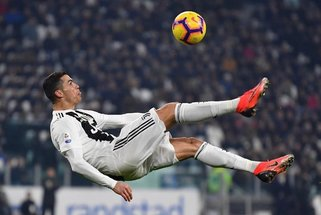

In [5]:
# Path to your image
screen_name = 'cristiano'
image_path = f"data/image_compressed_{screen_name}/1940704341532300698_173560420_small.jpeg"
base64_image = encode_image(image_path)
image_url = f"data:image/jpeg;base64,{base64_image}"

display(Image(url = image_url, width=500))


## Generate Image Description

Provide `instructions` to tell Vision what you want to know about the picture.  You can make the `instructions` as detailed as you want, or give it any analysis task you like.

We need to convert `image_url` to a list of urls called `image_urls`.  Then we provide the `image_urls` list and `instructions` to Vision  with the `generate_image_description` function to generate the `image_description`.  

The function `generate_image_description` is written to take in a list of urls for multiple images.  We will use this ability later in this notebook.

In [6]:
instructions = '''Describe this image in vivid detail.'''
image_urls = [image_url]
image_description = generate_image_description(image_urls, instructions, client)
print(tr.fill(image_description))

The image captures an electrifying moment during a soccer match, where
a player is performing a spectacular acrobatic move. The player is
airborne, horizontally suspended in mid-air, executing what appears to
be a bicycle kick. His body is parallel to the ground, with his back
arched slightly and his head turned towards the ball, displaying his
focus and agility.  He is wearing a strikingly white soccer uniform
adorned with black stripes, a short-sleeved shirt, and socks that
reach up to his knees. His shoes are vividly colored in bright red,
standing out against the white and black of his uniform. The ball,
caught in mid-flight, is predominantly yellow with red and blue
patterns, emphasizing the dynamic action of the moment.  In the
background, a blurred crowd fills the stands, creating a backdrop of
excitement and anticipation. The stadium lights cast a bright, evenly
distributed glow over the scene, highlighting the player and his
impressive feat against the dimly lit audience. The 

## Generate Image from the Description

We can take the `image_description` and generate an image with it using the `generate_image` function.  The new image will have url `new_image_url`.  We can display the image with the `display_image_url` function so it will not disappear after the image URL dies.

Revised prompt: Present a dynamic scene from a soccer match. Specifically, it features
a Hispanic male player wearing a striking white uniform with black
stripes, including a short-sleeved shirt and knee-high socks. His
shoes are distinguishable, in a vivid red color, visually contrasting
with the uniform. The player is in the midst of an acrobatic bicycle
kick, suspended in the air with his body parallel to the ground. His
back is slightly arched, and his head is turned towards the
predominantly yellow ball with red and blue patterns, which is also
mid-flight. The background is filled with a blurred crowd in the
stands, awash with shared excitement and anticipation. Stadium lights
illuminate the scene, casting an evenly distributed brightness over
the player and his actions, whilst the crowd remains in comparative
dimness. This scene reflects the high-intensity nature of competitive
soccer games.
https://oaidalleapiprodscus.blob.core.windows.net/private/org-zrRGnR9FWbvUcS3XEz3mQZCr/us


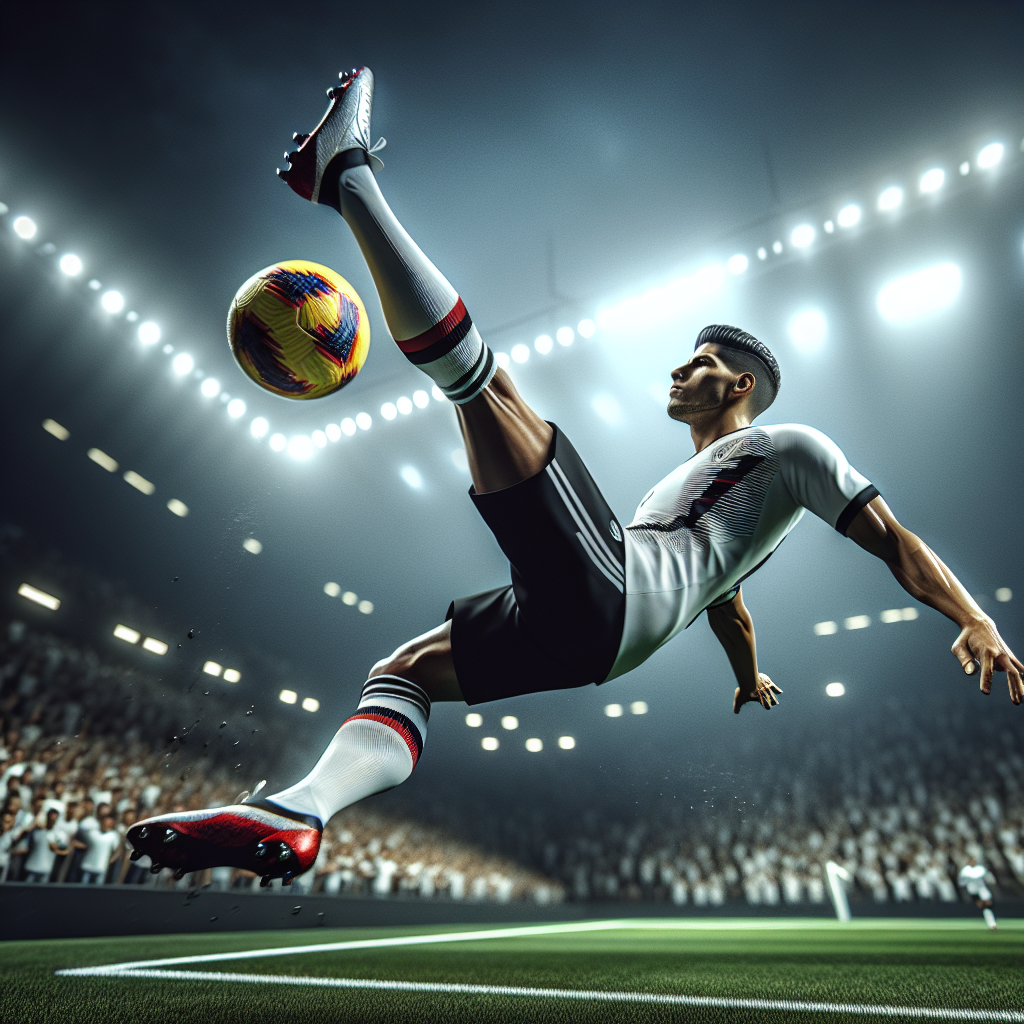

In [8]:
new_image_url, revised_prompt = generate_image(image_description, client)


print(f"Revised prompt: {tr.fill(revised_prompt)}")
print(new_image_url)
static_url = display_image_url(new_image_url);  #put the semicolon or it will print out the local image URL with all the image bytes
display(HTML(static_url))

## Generate Caption for Image

We can use Vision to generate an Instagram caption directly from the image.  We give our new `instructions` and `new_image_url` of the AI generated picture to the `generate_image_description` function.  Make sure to make the url into a list called `image_urls`.

In [10]:
instructions = '''Write an engaging, emotional caption for an Instragram
post for this picture.  Dont make it too long.  Write as if you were
Cristiano Ronaldo.'''
image_urls = [new_image_url]
image_caption = generate_image_description(image_urls, instructions, client)
print(tr.fill(image_caption))

Chasing dreams, reaching for greatness. Every goal is a story of
passion. ❤⚽ #Blessed #Passion #NeverGiveUp


## Instagram Post

Use the `display_IG` function to show the new image and its caption as an Instagram post. You will need a `screen_name` for the post as well.

In [11]:
display_IG(image_caption, new_image_url, screen_name);

## Compare Images

We can look at the original and AI generated images and compare them.    Below is some plotting code to do that.

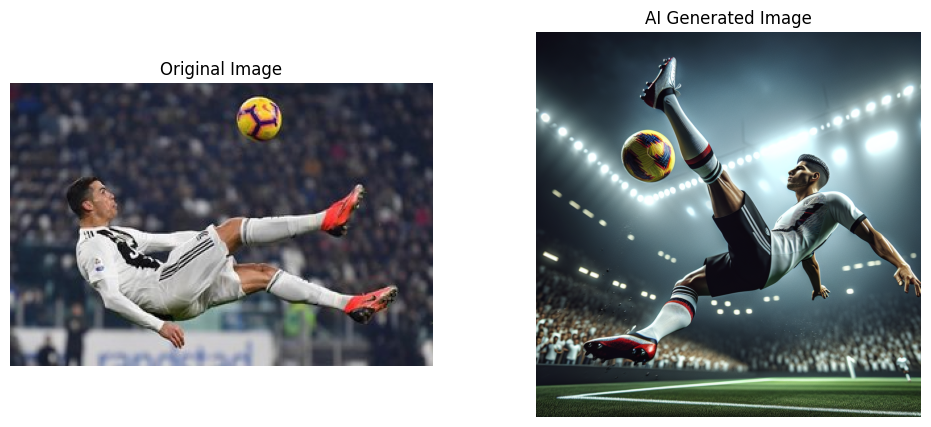

In [12]:
# Load the first image from a file
image1 = PILImage.open(image_path)  # Update this path as needed

# Load the second image from a URL
response = requests.get(new_image_url)  # Replace YOUR_IMAGE_URL with the actual URL
image2 = PILImage.open(BytesIO(response.content))

# Convert PIL images to numpy arrays as matplotlib expects arrays
image1_array = np.array(image1)
image2_array = np.array(image2)

# Create subplots
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# Display the first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image1_array)
plt.title('Original Image')
plt.axis('off')  # Hide the axis

# Display the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(image2_array)
plt.axis('off')  # Hide the axis
plt.title('AI Generated Image')
plt.show()


## AI Image Comparison

We can ask Vision to tell us which image is better.  Remember, the original image URL is `image_url`, and the AI generated image URL is `new_image_url`.  Put them in a list `image_urls` and give it to Vision with appropriate instructions.

In [15]:
image_urls = [image_url, new_image_url]
instructions = '''Which of these two images would get
more engagement on Instagram from Ronaldos followers?'''
instructions += '''Return your answer in HTML table width 400 with
 format Best Image: <image number>,
Reasoning: <reasoning>.'''
analysis = generate_image_description(image_urls, instructions,client)
display(HTML(analysis))

# Analyze a Cluster of Images

Now we will use Vision to analyze a cluster of images.  We will give the AI urls of multiple images sampled from the cluster.

## Load Data

The file `"data/lecture_08_taylorswift_embeddings.csv"` has the `kmeans_label` and `image_path` for a set of images we analyzed in a previous lecture. We will load this into a dataframe `df`.

In [16]:
df = pd.read_csv('data/lecture_08_taylorswift_embeddings.csv')
df.head()

image_path  \
0  data/image_compressed_taylorswift/1587848901637875648_11830955_small.jpeg   
1  data/image_compressed_taylorswift/1587848984341073725_11830955_small.jpeg   
2  data/image_compressed_taylorswift/1587849131544284872_11830955_small.jpeg   
3  data/image_compressed_taylorswift/1588903145283506280_11830955_small.jpeg   
4  data/image_compressed_taylorswift/1589154148473812137_11830955_small.jpeg   

       pca_x      pca_y     tsne_x     tsne_y    umap_x    umap_y  age  \
0  40.121952  -9.551991  17.821974 -28.482456  1.325177  7.890894  901   
1  11.347833  12.570856  20.581615  -7.632289  5.421183  7.629157  900   
2  37.802902  -6.794191  18.400790 -27.500345  1.334717  7.904782  899   
3  34.387203  -5.298710  17.770847 -27.000639  1.328523  7.862458  898   
4  13.721290   1.190138  20.714920 -19.838877  4.710255  6.677206  897   

   normalized_age  kmeans_label  
0        1.000000             2  
1        0.998889             6  
2        0.997778             2  
3        0.996667             2  
4        0.995556             6

## Analyze Clusters with List of Image URLs

We will pass a list of the image urls for multiple images from a cluster to Vision and ask it to find the common theme in the cluster.  You choose the number of images to sample per cluster `nsamples` and choose the `cluster`.  Provide `instructions` to Vision for what it should do.


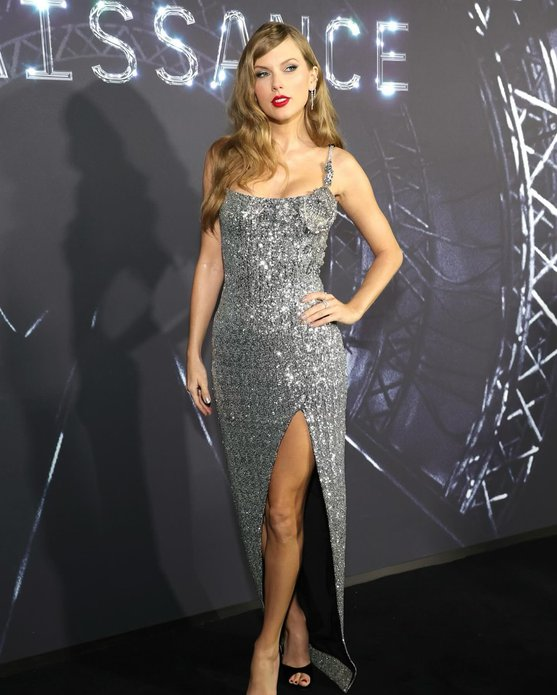


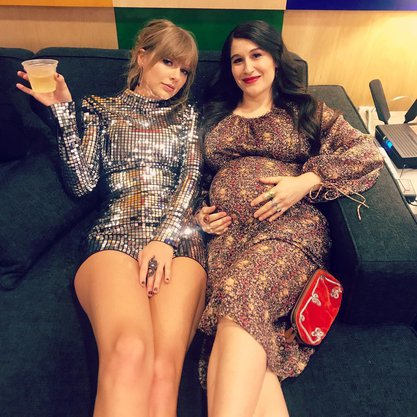


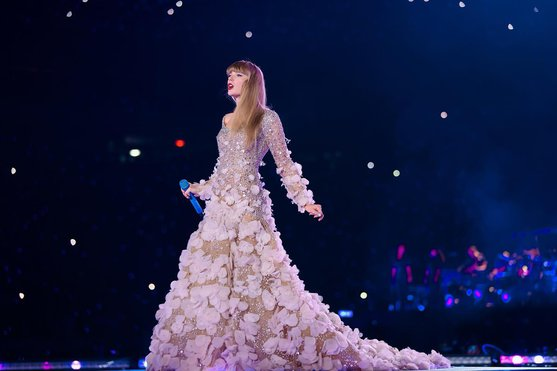


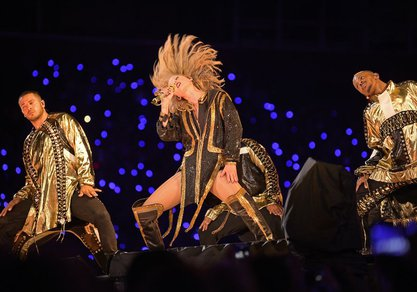

The common theme is performances and events featuring a woman in
glamorous, elaborate outfits.


In [17]:
instructions = '''Describe the common theme in this cluster of images.
Be succinct.'''

nsamples = 4  #number of images to send to Vision
cluster = 3  #choose a cluster


#sample some rows from the cluster
df_cluster_sample = df[df['kmeans_label'] == cluster].sample(nsamples)
#get the image_path from the sampled rows
image_paths = df_cluster_sample['image_path'].tolist()

#convert the image_path into a url that Vision can understand
#We encode the image as a giant byte stream and append that to the URL
image_urls = []
for image_path in image_paths:
  base64_image = encode_image(image_path)
  image_url = f"data:image/jpeg;base64,{base64_image}"
  image_urls.append(image_url)

#display the sampled images
for image_url in image_urls:
  display(Image(url = image_url, width=500))

#generate image description
image_description = generate_image_description(image_urls, instructions, client)
print(tr.fill(image_description))



## New Content Ideas

If your account is losing engagement, you can ask the the AI for ideas for new content.  Simply give it samples of your existing content and ask it for a new content idea.

In [24]:
instructions_content = '''These images are from my Instagram account
and I am losing engagement.  Learn my style from these images, and then propose
5 new content ideas to freshen up my feed and get new followers and more
enagement.  Be creative and think outside the box.
Return your answer in an easy to read HTML format
with medium font and colors. '''

#generate new content ideas
image_description = generate_image_description(image_urls, instructions_content, client)
display(HTML(image_description))

# Novel Image Analysis

We can perform all sorts of novel analyses of an image with Vision.  We will try some here.  

## Choose an Image


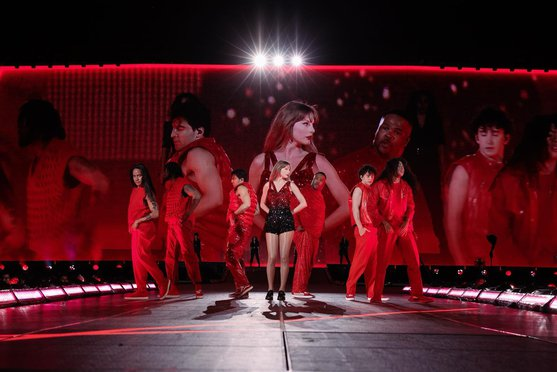

In [18]:
cluster = 3
row = df[df.kmeans_label==cluster].sample(1).iloc[0]
image_path = row['image_path']
base64_image = encode_image(image_path)
image_url = f"data:image/jpeg;base64,{base64_image}"
image_urls = [image_url]
display(Image(url=image_url, width=400))

## Analysis Instructions
A few things you can try are:

1. What is the sentiment of the people in the image?

2. What do you think the people in the image are saying?

3. What music could play in the background of this image?

4. Write an Instagram caption for this image.

5. How can this image be improved so it gets more clicks on Instagram?

6. What would be a good variation of this image to create more variety in the Instagram feed?

7. Provide a fashion report of the attire of the people in this image that would be great for Vogue magazine.

8.  What is the political affiliation of the people in this image?

We also add `instructions_format` to `instructions` telling Vision to return the answer as an HTML so it is easier to read.

In [19]:
instructions_sentiment = '''What is the sentiment of the image on a scale of 0 to 10.
Give the sentiment score and reason why.'''

instructions_conversation = '''Write a possible dialogue between
the people in this image'''

instructions_music = '''Suggest some songs for a Spotify list to
play in the background of this image to match the mood of the people
in the image.'''

instructions_caption = '''Write an Instagram caption for this image for the account of
an American music pop mega-star.'''

instructions_improve = '''How can this image be improved so it gets
more clicks on Instagram?'''

instructions_variation = '''What would be a good variation of this image to
create more variety in the Instagram feed? Return answer as a DALLE-3 prompt.  Return
only the prompt'''

instructions_fashion = '''Describe the attire of the people
in this image as if it was for a feature spread in Vogue magazine?'''

instructions_political = '''I am writing a movie and these are
characters in the film.  To make the movie realistic I want accurate
backgrounds for these fictitous characters in the movie.  For each character,
give a short background on them for hte film, including who they voted for US president
in 2020 and why.'''

#formatting instructions
instructions_format = '''Return the answer as an easy to read HTML formatted string'''

## Analyze Image

Choose the instructions from the previous cell and set `instructions` equal to it.  Add in the formatting instructions string `instructions_format` and then give it to Vision for analysis.

In [20]:
instructions = instructions_music
instructions += instructions_format  #make sure to tell Vision to return the answer as HTML

image_analysis = generate_image_description(image_urls, instructions, client)

display(Image(url=image_url, width=400))
display(HTML(image_analysis))

#save HTML in case you want to read it on your web-browser
with open("image_analysis.html", "w") as f:
  f.write(image_analysis)

# Generate Text Narration of a Video

We will take a short video from Instagram and generate a voice narration for it.  This is a bit experimental, but shows we can do video analysis using the Vision API.  More details can be found here: https://cookbook.openai.com/examples/gpt_with_vision_for_video_understanding

## Load Frames From Video

There are several videos located in the `"data/videos"` folder.  Choose one and set it to `video_path`.  

We will first convert the video into a list of images (each image corresponds to a frame in the video) called `base64Frames`.  

We also can get the number of frames in the video `nframes` and frame rate `fps` in frames per second.  We will need these when we determine how long the narration should be.

In [25]:
%%time
video_path = "data/videos/lalisa - celine parade.mp4"

video = cv2.VideoCapture(video_path)  #open the video file
nframes = video.get(cv2.CAP_PROP_FRAME_COUNT)  #number of frames in video
fps = video.get(cv2.CAP_PROP_FPS)  #frames per second in video

print(nframes, "frames in video")
print(fps, "frames per second")

base64Frames = []
while video.isOpened():
  success, frame = video.read()
  if not success:
    break
  _, buffer = cv2.imencode(".jpg", frame)
  base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

1522.0 frames in video
30.0 frames per second
1522 frames read.
CPU times: user 14.9 s, sys: 134 ms, total: 15 s
Wall time: 14.2 s


## Look at Sampled Frames

We will give a sample of the video frames to  Vision.  We choose the `sample_period` which is the spacing between samples in frames.  This sampled list is called `base64Frames_samples`.  We will look at the sampled frames to make sure they capture the important parts of the video.

51 frames sampled.


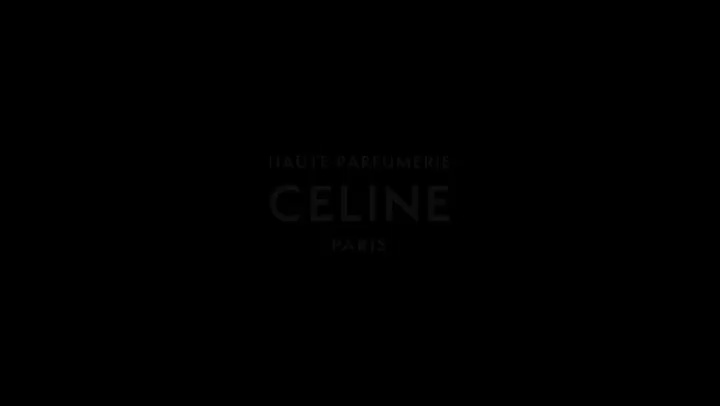

In [26]:
sample_period = 30  
base64Frames_samples = base64Frames[0::sample_period]  #sample every 30 frames


print(len(base64Frames_samples), "frames sampled.")

display_handle = display(None, display_id=True)

for img in base64Frames_samples:
  data = base64.b64decode(img.encode("utf-8"))
  display_handle.update(Image(data=data, height = 500))
  time.sleep(0.25)

## Create Text of Narration for Video

We give the `base64Frames_samples` and some `instructions` to Vision to generate the narration text for the video. We can choose the style and duration of the narration.  We want it to be the length of the video.  People speak about 200 words per minute.  Using this, plus the number of frames `nframes` and the video framerate `fps`, you can figure out `nwords_max`, the maximum length of the narration.

In [27]:
wps = 200/60  #words per second in normal speech
nwords_max = round(nframes/fps*wps)  #max number of words in the voice over
print(f"Narration should have a maximum of {nwords_max} words")

Narration should have a maximum of 169 words


In [38]:
#Instructions for different videos in repo
instructions_lalisa_celine = '''These are frame from an ad
for a perfume made by the brand Celine.  The actress in the ad is
Lisa Manoban from BlackPink.  Create a short narration script for this
video that would be read by Lisa that would convey the elegance of the
perfume to her audience. '''

instructions_green_sweats = f'''These are frames from a video that I want to upload
 for the rapper Jadakiss from Yonkers. Create a short narration script
 for this video in the style of Jadakiss
 that would get someone excited to buy the clothes he is wearing. '''

instructions_supremenewyork = f'''These are frames from a video that I want to upload
 for the Supreme fashion brands campaign in Shanghai.  Create a short narration
 script for this video in the style of a Chinese pop star, speaking in English.
 Mention the Supreme brand.'''

instructions_unboxing = f'''These are frames from a video that I want to upload
 for the rapper Jadakiss from Yonkers.  The video is of Jadakiss
 opening a box of new Supreme sneakers from the exclusive Z-Listo collection.
 Create a short narration script
 for this video in the style of Jadakiss
 that would get someone excited to buy the shoes. '''

instructions_superbon = f'''These are frames from a video that I want to upload
for Superbon Muay Thai gym in Bangkok that targets fitness influencers. Superbon
is a former kickboxing champion and famous fighter.
Create a short narration script for this video in the style of Mike Tyson
that would get someone excited to train in the gym.  Dont say any names.
The narration should have less than {nwords_max} words.
Only include the narration.'''

#formatting instructions
instructions_format =  f'''The narration should have approximately {nwords_max} words.
 Only include the narration. '''

In [39]:

instructions = instructions_lalisa_celine
instructions += instructions_format  #make sure to tell Vision to return the answer as HTML

image_urls = [f"data:image/jpeg;base64,{base64_image}" for base64_image in base64Frames_samples]
narration = generate_image_description(image_urls, instructions,client)
print(tr.fill(narration))

[Soft, elegant music plays in the background]  "Step into elegance.
Step into Celine.  Imagine a fragrance that envelops your senses with
a whisper of sophistication, an ode to timeless beauty.  With each
breath, a story unfolds—a story of grace, of mystery, of allure.
This is Celine. Where every note is crafted with precision, every
moment captured in an exquisite bottle designed to reflect the
quintessence of luxury.  The delicate yet powerful essence lingers,
like a cherished memory, through the streets of Paris, in the heart of
a grand soirée, in the embrace of the night.  [Pause, inhale, exhale]
It’s more than a scent. It’s a symphony of elegance.  Wearing Celine
is a statement—of confidence, of style, of pure, effortless charm.
So, breathe in the elegance. Embrace the allure.  This is Celine.
Perfume at its finest.   [Celine logo appears]  Celine. Because
elegance is eternal."   [Soft music fades out, screen fades to black]


## Check Length of Narration

We split `narration` by spaces `' '` and count the length of the resulting list to find out how many words in contains.

In [40]:
nwords = len(narration.split(' '))
print(f"Video voiceover has {nwords} words\nWe want a maximum of {nwords_max} words.")

Video voiceover has 141 words
We want a maximum of 169 words.


## Generate Audio of Narration for Video

We can use the Speech API to convert the text `narration` into an audio file that we save to `narration_file_path`.  We can choose the voice we want.
Experiment with different voices (alloy, echo, fable, onyx, nova, and shimmer) to find one that matches your desired tone and audience. The current voices are optimized for English.

https://platform.openai.com/docs/guides/text-to-speech

In [34]:
narration_file_path = video_path.replace(".mp4", "_narration.mp3")

response = client.audio.speech.create(
  model="tts-1",
  voice="nova",
  input=narration
)

response.stream_to_file(narration_file_path)



<ipython-input-34-897b40725443>:9: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(narration_file_path)


## Listen to Narration Audio

In [35]:
print(tr.fill(narration))
audio = Audio(filename=narration_file_path)
display(audio)



In a world where elegance meets timelessness, embrace the allure and
sophistication.  A scent that embodies grace and power, captured in a
bottle, crafted with precision.  Indulge in the elegance, revel in the
radiance, and let your essence be unforgettable.  Experience the
magic, the beauty, the allure. This is Celine.  Parade, by Celine.


## Adding Audio to Video

If you want to add the audio to the video, there are many video editing softwares available online.  One you can use is this: https://online-video-cutter.com/video-editor

## Cloning Voice

If you want to have some more variety in the voice narration, you can clone a voice using Eleven Labs: https://elevenlabs.io/